In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
up = files.upload()



Saving Salary_Data.csv to Salary_Data.csv


In [3]:
data = pd.read_csv(io.StringIO(up['Salary_Data.csv'].decode('utf-8')))
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


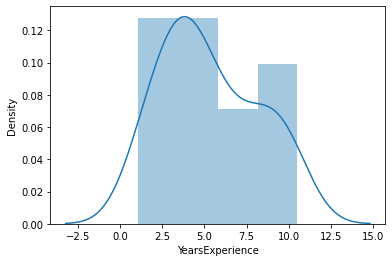

In [7]:
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


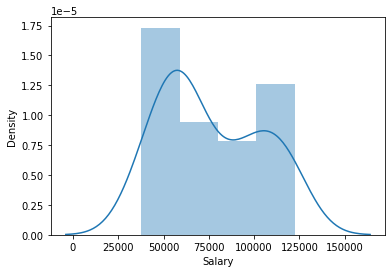

In [8]:
sns.distplot(data['Salary'])

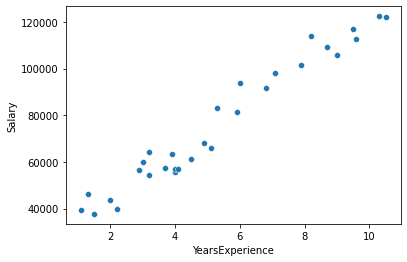

In [9]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])

## For y~x

In [10]:
model = smf.ols('Salary~YearsExperience',data = data).fit()

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)  

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

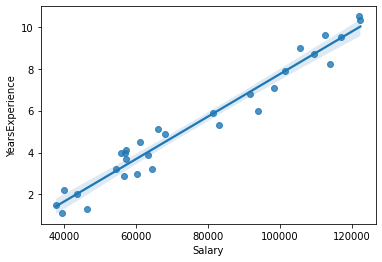

In [14]:
sns.regplot(x="Salary", y="YearsExperience", data=data);

In [15]:
model.predict(data)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

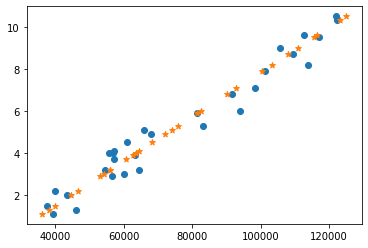

In [16]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='*')
plt.show()

## for y~np.log(x)

In [17]:
x = data.YearsExperience
y = data.Salary

In [18]:
model = smf.ols('y~np.log(x)',data = data).fit()

In [19]:
model.params

Intercept    14927.97177
np.log(x)    40581.98796
dtype: float64

In [20]:
print(model.tvalues, '\n', model.pvalues) 

Intercept     2.895135
np.log(x)    12.791989
dtype: float64 
 Intercept    7.268813e-03
np.log(x)    3.250155e-13
dtype: float64


In [21]:
(model.rsquared,model.rsquared_adj)


(0.853888882875697, 0.8486706286926862)

In [22]:
model.predict(data)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

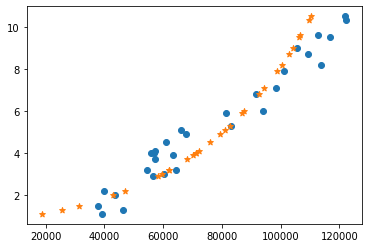

In [23]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='*')
plt.show()

##  for np.log(y)~x 

In [24]:
x = data.YearsExperience
y = data.Salary

In [25]:
model = smf.ols('np.log(y)~x',data = data).fit()

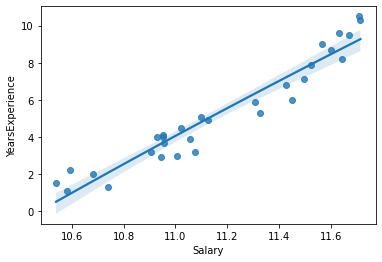

In [26]:
sns.regplot(x=np.log(y), y=x, data=data,logx=True);

In [27]:
model.params

Intercept    10.507402
x             0.125453
dtype: float64

In [28]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    273.327166
x             19.584833
dtype: float64 
 Intercept    1.604634e-49
x            7.027439e-18
dtype: float64


In [29]:
(model.rsquared,model.rsquared_adj)

(0.9319671194084196, 0.929537373673006)

In [30]:
np.exp(model.predict(data))

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

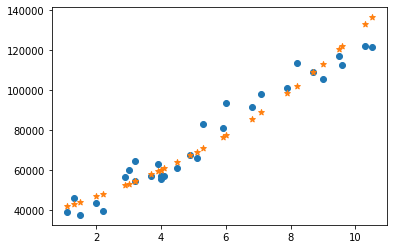

In [31]:
plt.scatter(data.YearsExperience,(data.Salary))
plt.scatter(data.YearsExperience,np.exp(model.predict(data)),marker='*')
plt.show()

## for np.log(y)~np.log(x)

In [32]:
x = data.YearsExperience
y = data.Salary

In [33]:
model = smf.ols('np.log(y)~np.log(x)',data = data).fit()

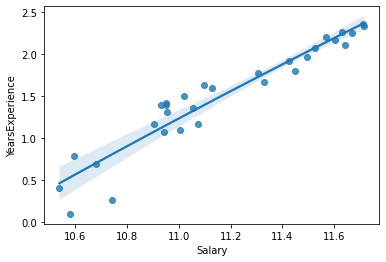

In [34]:
sns.regplot(x=np.log(y), y=np.log(x), data=data,logx=True);

In [35]:
model.params

Intercept    10.328043
np.log(x)     0.562089
dtype: float64

In [36]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    184.867959
np.log(x)     16.352542
dtype: float64 
 Intercept    9.073132e-45
np.log(x)    7.395278e-16
dtype: float64


In [37]:
(model.rsquared,model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

In [38]:
np.exp(model.predict(data))

0      32261.052293
1      35437.122429
2      38405.293942
3      45145.842502
4      47630.388981
5      55631.518478
6      56701.779991
7      58796.479782
8      58796.479782
9      63795.788170
10     65711.741723
11     66653.561692
12     66653.561692
13     67585.125762
14     71215.679585
15     74707.408671
16     76406.350778
17     78076.357099
18     82927.671492
19     83714.809188
20     89816.499870
21     92022.700793
22     97714.345570
23     99783.038699
24    103158.601018
25    105143.207648
26    108387.620951
27    109027.449995
28    113427.055251
29    114659.822462
dtype: float64

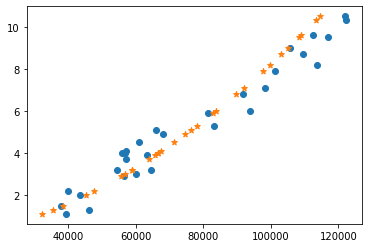

In [39]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.exp(model.predict(data)),data.YearsExperience,marker='*')
plt.show()

## for y~np.power(x,3)

In [40]:
x = data.YearsExperience
y = data.Salary

In [41]:
model = smf.ols('y~np.power(x,3)',data = data).fit()

In [42]:
model.params

Intercept         55911.623915
np.power(x, 3)       71.264833
dtype: float64

In [43]:
print(model.tvalues, '\n', model.pvalues) 

Intercept         20.887108
np.power(x, 3)    11.870804
dtype: float64 
 Intercept         1.295610e-18
np.power(x, 3)    1.922328e-12
dtype: float64


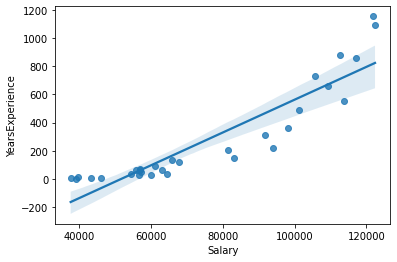

In [44]:
sns.regplot(x=y, y=np.power(x,3), data=data);

In [45]:
(model.rsquared,model.rsquared_adj)

(0.8342371274125908, 0.8283170248201833)

In [46]:
model.predict(data)

0      56006.477408
1      56068.192753
2      56152.142727
3      56481.742580
4      56670.451858
5      57649.701930
6      57835.774409
7      58246.829967
8      58246.829967
9      59521.401507
10     60138.982551
11     60472.573235
12     60472.573235
13     60823.267478
14     62405.631833
15     64295.860267
16     65364.975293
17     66521.318475
18     70547.924076
19     71304.827869
20     78319.567922
21     81418.091601
22     91047.965971
23     95204.772422
24    102839.730318
25    107863.687259
26    117012.310210
27    118962.187309
28    133784.631214
29    138409.576354
dtype: float64

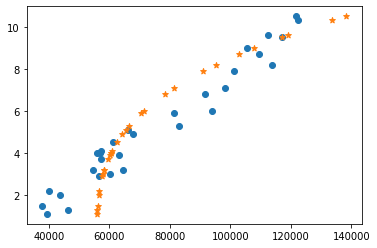

In [47]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter((model.predict(data)),data.YearsExperience,marker='*')
plt.show()

## for np.power(y,3)~x

In [48]:
x = data.YearsExperience
y = data.Salary

In [49]:
model = smf.ols('np.power(y,3)~x',data = data).fit()

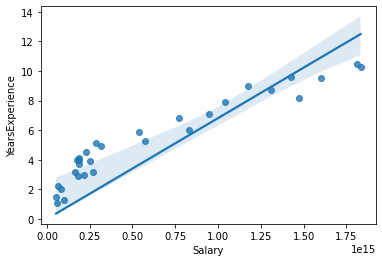

In [50]:
sns.regplot(x=np.power(y,3), y=x, data=data);

In [51]:
model.params

Intercept   -4.327463e+14
x            1.964878e+14
dtype: float64

In [52]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    -6.475932
x            17.646409
dtype: float64 
 Intercept    5.135483e-07
x            1.052473e-16
dtype: float64


In [53]:
(model.rsquared,model.rsquared_adj)

(0.9175004408289745, 0.9145540280014379)

In [54]:
np.cbrt(model.predict(data))

0     -60056.399416
1     -56179.707720
2     -51678.309464
3     -34134.028219
4      -7791.925093
5      51559.944943
6      53914.494280
7      58089.313903
8      58089.313903
9      66513.492035
10     69351.578203
11     70687.444717
12     70687.444717
13     71974.642980
14     76713.100915
15     80928.965104
16     82881.507543
17     84746.148080
18     89898.316033
19     90701.540108
20     96669.328276
21     98727.792156
22    103834.658345
23    105626.006869
24    108483.253330
25    110127.788833
26    112764.330875
27    113277.071407
28    116742.910729
29    117696.237334
dtype: float64

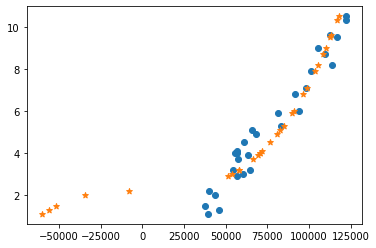

In [55]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.cbrt(model.predict(data)),data.YearsExperience,marker='*')
plt.show()

## for np.power(y,3)~np.power(x,3)

In [56]:
x = data.YearsExperience
y = data.Salary

In [57]:
model = smf.ols('np.power(y,3)~np.power(x,3)',data = data).fit()

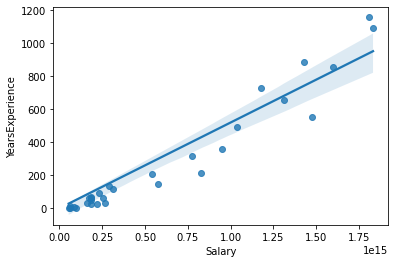

In [58]:
sns.regplot(x=np.power(y,3), y=np.power(x,3), data=data);

In [59]:
model.params

Intercept         1.583456e+14
np.power(x, 3)    1.606500e+12
dtype: float64

In [60]:
print(model.tvalues, '\n', model.pvalues) 

Intercept          4.636538
np.power(x, 3)    20.974769
dtype: float64 
 Intercept         7.488319e-05
np.power(x, 3)    1.160122e-18
dtype: float64


In [61]:
(model.rsquared,model.rsquared_adj)

(0.9401633889252157, 0.9380263671011162)

In [62]:
np.cbrt(model.predict(data))

0      54343.024451
1      54499.605436
2      54711.165303
3      55526.365633
4      55982.524429
5      58238.274480
6      58647.629666
7      59532.235184
8      59532.235184
9      62120.445349
10     63300.454905
11     63919.954621
12     63919.954621
13     64558.524597
14     67293.871112
15     70294.592054
16     71884.167359
17     73527.827384
18     78745.374897
19     79652.116511
20     87218.662268
21     90177.824127
22     98318.994170
23    101449.499685
24    106742.816526
25    109958.225696
26    115372.919533
27    116463.318927
28    124155.623503
29    126370.419463
dtype: float64

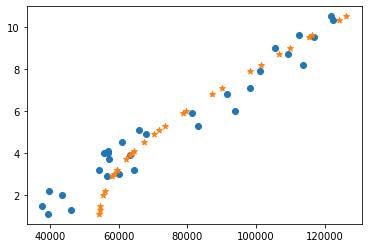

In [63]:
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.cbrt(model.predict(data)),data.YearsExperience,marker='*')
plt.show()

## The transformation for y~x gives the best r-squared value and hence can be accepted.